**Exercici 1**

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
import nltk

#nltk.download('punkt')
#nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
text = 'Iceland is a European island country, whose territory includes the island of the same name and some small adjacent islands and islets in the Atlantic Ocean. Its capital is Reykjavík. It has a population of about 366,425 inhabitants and an area of 103,000 km².1​5​ Due to its location on the mid-Atlantic ridge, it is a country with great volcanic and geological activity, a factor that greatly affects the landscape. of Icelandic territory. The interior of the country consists of a plateau characterized by deserts, mountains, glaciers and glacial rivers that flow to the sea through the lowlands. Thanks to the effects of the Gulf Stream, it has a temperate climate, relative to its latitude, and provides a habitable environment.'

In [4]:
words = nltk.word_tokenize(text)
words

['Iceland',
 'is',
 'a',
 'European',
 'island',
 'country',
 ',',
 'whose',
 'territory',
 'includes',
 'the',
 'island',
 'of',
 'the',
 'same',
 'name',
 'and',
 'some',
 'small',
 'adjacent',
 'islands',
 'and',
 'islets',
 'in',
 'the',
 'Atlantic',
 'Ocean',
 '.',
 'Its',
 'capital',
 'is',
 'Reykjavík',
 '.',
 'It',
 'has',
 'a',
 'population',
 'of',
 'about',
 '366,425',
 'inhabitants',
 'and',
 'an',
 'area',
 'of',
 '103,000',
 'km².1\u200b5\u200b',
 'Due',
 'to',
 'its',
 'location',
 'on',
 'the',
 'mid-Atlantic',
 'ridge',
 ',',
 'it',
 'is',
 'a',
 'country',
 'with',
 'great',
 'volcanic',
 'and',
 'geological',
 'activity',
 ',',
 'a',
 'factor',
 'that',
 'greatly',
 'affects',
 'the',
 'landscape',
 '.',
 'of',
 'Icelandic',
 'territory',
 '.',
 'The',
 'interior',
 'of',
 'the',
 'country',
 'consists',
 'of',
 'a',
 'plateau',
 'characterized',
 'by',
 'deserts',
 ',',
 'mountains',
 ',',
 'glaciers',
 'and',
 'glacial',
 'rivers',
 'that',
 'flow',
 'to',
 'the',


In [5]:
words_freq = FreqDist(words)
print(words_freq)
words_freq

<FreqDist with 82 samples and 133 outcomes>


FreqDist({'the': 10, ',': 8, 'a': 7, 'of': 7, 'and': 6, '.': 6, 'to': 4, 'is': 3, 'country': 3, 'island': 2, ...})

In [6]:
comm_words = words_freq.most_common(5)
comm_words

[('the', 10), (',', 8), ('a', 7), ('of', 7), ('and', 6)]

In [7]:
for palabra, frecuencia in words_freq.items():
    if frecuencia > 2:
        print(f'Palabra: {palabra}, Frecuencia: {frecuencia}')


Palabra: is, Frecuencia: 3
Palabra: a, Frecuencia: 7
Palabra: country, Frecuencia: 3
Palabra: ,, Frecuencia: 8
Palabra: the, Frecuencia: 10
Palabra: of, Frecuencia: 7
Palabra: and, Frecuencia: 6
Palabra: ., Frecuencia: 6
Palabra: to, Frecuencia: 4


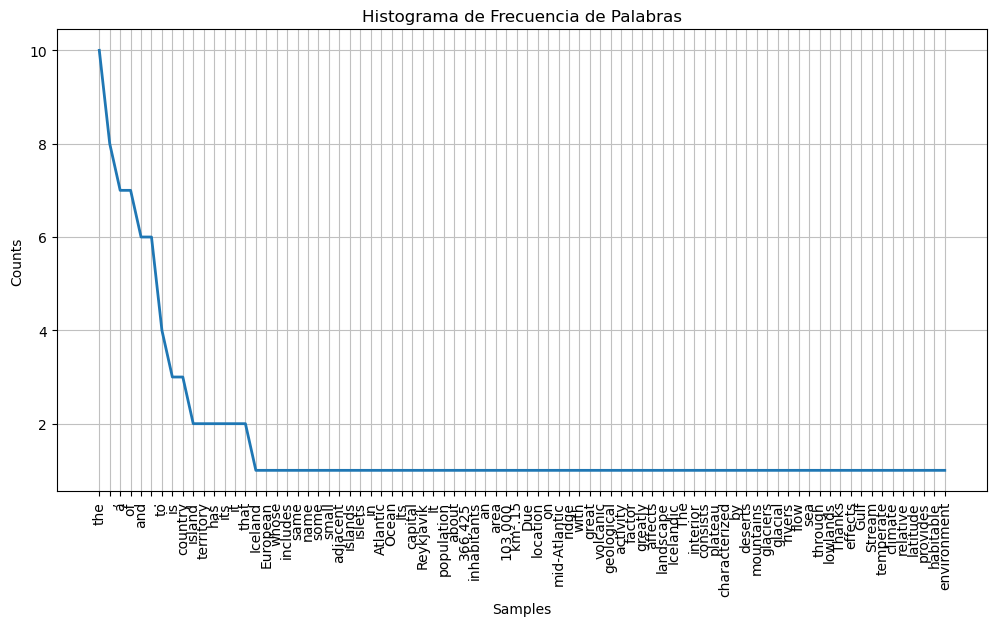

In [8]:
import matplotlib.pyplot as plt

# A continuación creamos un histograma deonde se puede ver más claramente la frecuencia de las palaras.

plt.figure(figsize = (12, 6))

plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Palabras')

words_freq.plot(82, cumulative=False)

plt.show()

El texto es un busqueda sobre Islandia en wikiloc.  
Si consideramos que la mayoría de las palabras únicamente aparecen una vez (puesto que no es un texto muy largo) y el resto entre 2 y 10, y si descartamos las que no tienen significado en sí mismas, sin contexto.. quedarían entonces 3 palabras cuya frecuencia no es muy alta tampoco, pero que son clave en la definición:    
- Country
- Island
- Territory  

Estas tres palabras dan una idea realmente acertada de la idea de Islandia, por lo que podríamos dedudir que wikiloc da una definicion muy correcta sobre este país.

**Exercici 2**

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [9]:
#nltk.download('stopwords')

stopwords_en = set(stopwords.words('english'))

filtered_words = []
for palabra in words:
    if palabra not in stopwords_en:
        filtered_words.append(palabra)

print(len(filtered_words))
print(filtered_words)


79
['Iceland', 'European', 'island', 'country', ',', 'whose', 'territory', 'includes', 'island', 'name', 'small', 'adjacent', 'islands', 'islets', 'Atlantic', 'Ocean', '.', 'Its', 'capital', 'Reykjavík', '.', 'It', 'population', '366,425', 'inhabitants', 'area', '103,000', 'km².1\u200b5\u200b', 'Due', 'location', 'mid-Atlantic', 'ridge', ',', 'country', 'great', 'volcanic', 'geological', 'activity', ',', 'factor', 'greatly', 'affects', 'landscape', '.', 'Icelandic', 'territory', '.', 'The', 'interior', 'country', 'consists', 'plateau', 'characterized', 'deserts', ',', 'mountains', ',', 'glaciers', 'glacial', 'rivers', 'flow', 'sea', 'lowlands', '.', 'Thanks', 'effects', 'Gulf', 'Stream', ',', 'temperate', 'climate', ',', 'relative', 'latitude', ',', 'provides', 'habitable', 'environment', '.']


In [10]:
filtered_text = ' '.join(filtered_words)
print(filtered_text)

Iceland European island country , whose territory includes island name small adjacent islands islets Atlantic Ocean . Its capital Reykjavík . It population 366,425 inhabitants area 103,000 km².1​5​ Due location mid-Atlantic ridge , country great volcanic geological activity , factor greatly affects landscape . Icelandic territory . The interior country consists plateau characterized deserts , mountains , glaciers glacial rivers flow sea lowlands . Thanks effects Gulf Stream , temperate climate , relative latitude , provides habitable environment .


In [11]:
stemmer = SnowballStemmer('english')

stemmed_words = []
for palabra in filtered_words:
    stemmed_words.append(stemmer.stem(palabra))

print(len(stemmed_words))
print(stemmed_words)

79
['iceland', 'european', 'island', 'countri', ',', 'whose', 'territori', 'includ', 'island', 'name', 'small', 'adjac', 'island', 'islet', 'atlant', 'ocean', '.', 'it', 'capit', 'reykjavík', '.', 'it', 'popul', '366,425', 'inhabit', 'area', '103,000', 'km².1\u200b5\u200b', 'due', 'locat', 'mid-atlant', 'ridg', ',', 'countri', 'great', 'volcan', 'geolog', 'activ', ',', 'factor', 'great', 'affect', 'landscap', '.', 'iceland', 'territori', '.', 'the', 'interior', 'countri', 'consist', 'plateau', 'character', 'desert', ',', 'mountain', ',', 'glacier', 'glacial', 'river', 'flow', 'sea', 'lowland', '.', 'thank', 'effect', 'gulf', 'stream', ',', 'temper', 'climat', ',', 'relat', 'latitud', ',', 'provid', 'habit', 'environ', '.']


In [12]:
stemmed_text = ' '.join(stemmed_words)
print(stemmed_text)

iceland european island countri , whose territori includ island name small adjac island islet atlant ocean . it capit reykjavík . it popul 366,425 inhabit area 103,000 km².1​5​ due locat mid-atlant ridg , countri great volcan geolog activ , factor great affect landscap . iceland territori . the interior countri consist plateau character desert , mountain , glacier glacial river flow sea lowland . thank effect gulf stream , temper climat , relat latitud , provid habit environ .


**Exercici 3**

Realitza sentiment analysis al teu conjunt de dades.

In [13]:
analyzer = SentimentIntensityAnalyzer()

sentiment = analyzer.polarity_scores(stemmed_text)
print(sentiment)

{'neg': 0.052, 'neu': 0.804, 'pos': 0.143, 'compound': 0.8316}


In [14]:
if sentiment['compound'] >= 0.3:
    print ('Sentimiento: Positivo')
elif sentiment['compound'] < 0.3:
    print('Sentimiento: Negativo')
else:
    print('Sentimiento: Neutral')

Sentimiento: Positivo
